In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Task 1

In [2]:
def init_q_table(n_states,n_actions):
    return np.zeros((n_states,n_actions))

In [3]:
def q_update(Q, s, a, r, s_next, alpha, gamma):
    max_q_next=np.max((Q[s_next[0],s_next[1]]))
    Q[s[0],s[1],a]+=alpha*(r+gamma*max_q_next-Q[s[0],s[1],a])
    return Q

# Task 2

In [4]:
def init_q_table(n_states,n_actions):
    return np.zeros((n_states,n_actions))

In [5]:
GRID_SIZE=int(input("Enter grid size (e.g., 4 for 4x4): "))
actions=['up','right','down','left']
action_to_change={
    0: (0, -1),  # up
    1: (1, 0),   # right
    2: (0, 1),   # down
    3: (-1, 0)   # left
}
 # 0: up, 1: right, 2: down, 3: left
terminal_states=[(GRID_SIZE-1,GRID_SIZE-1)]


In [6]:
def step(state,action):
    if state in terminal_states:
        return state, 0.0, True
    dx,dy=action_to_change[action]
    new_state=(max(0,min(GRID_SIZE-1,state[0]+dx)),max(0,min(GRID_SIZE-1,state[1]+dy)))
    if new_state == (GRID_SIZE-1,GRID_SIZE-1):
        return new_state, 10.0, True
    else:
        return new_state, -1.0, False
    


In [7]:
def greedy_policy(Q, state,epsilon):
    if np.random.rand()<epsilon:
        return np.random.choice(4)
    else:
        return np.argmax(Q[state[0],state[1]])

In [8]:
def q_update(Q, s, a, r, s_next, alpha, gamma):
    max_q_next=np.max((Q[s_next[0],s_next[1]]))
    Q[s[0],s[1],a]+=alpha*(r+gamma*max_q_next-Q[s[0],s[1],a])
    return Q

In [9]:
def train(epsilon,alpha=0.1,gamma=0.99,episodes=500):
    Q=np.zeros((GRID_SIZE,GRID_SIZE,4))
    rewards=[]
    
    for episode in range(episodes):
        state=(0,0)
        total_reward=0
        done=False
        while not done:
            action=greedy_policy(Q,state,epsilon)
            next_state,reward,done=step(state,action)
            Q=q_update(Q, state, action, reward, next_state, alpha, gamma)
            state=next_state
            total_reward+=reward
        rewards.append(total_reward) 
        if (episode + 1) % 50 == 0:
            avg = np.mean(rewards[-50:])
            print(f"Episode {episode + 1}, Avg Reward (last 50): {avg:.2f}")       
    return Q, rewards

In [10]:
def main():
    epsilon=0.1
    alpha=0.1
    gamma=0.99
    episodes=500
    Q, rewards=train(epsilon,alpha,gamma,episodes)
    print("Trained Q-Table:")
    print(Q)
    print("Rewards per episode:")
    print(rewards)

if __name__=="__main__":
    main()



Episode 50, Avg Reward (last 50): -0.50
Episode 100, Avg Reward (last 50): 4.60
Episode 150, Avg Reward (last 50): 4.26
Episode 200, Avg Reward (last 50): 4.34
Episode 250, Avg Reward (last 50): 4.28
Episode 300, Avg Reward (last 50): 4.44
Episode 350, Avg Reward (last 50): 4.52
Episode 400, Avg Reward (last 50): 4.28
Episode 450, Avg Reward (last 50): 4.44
Episode 500, Avg Reward (last 50): 4.24
Trained Q-Table:
[[[ 2.27993848  4.60890549 -0.07896643  1.37403872]
  [-0.91898214  5.2772428  -1.21620178 -0.37273993]
  [-0.69190275 -0.62818916 -0.73642069 -0.79107621]
  [-0.43603499 -0.34881952 -0.3994004  -0.3994004 ]]

 [[ 1.92983162  1.66245804  5.6655611   1.55848849]
  [ 2.91569067  6.73289     0.50590162  2.96688613]
  [-0.44169616  4.06239051 -0.39976345 -0.44198067]
  [-0.30851298  0.96027146 -0.1        -0.1       ]]

 [[-0.59628647 -0.49278555  5.73263291 -0.69521841]
  [ 1.5870951   7.811       4.94344124  4.30995451]
  [ 0.39280672  8.67587694 -0.1        -0.1       ]
  [-0.1

In [11]:
def moving_average(data, window_size=50):
    return np.convolve(data, np.ones(window_size)/window_size, 'valid')

Training for epsilon=0.1
Episode 50, Avg Reward (last 50): -0.38
Episode 100, Avg Reward (last 50): 4.54
Episode 150, Avg Reward (last 50): 4.02
Episode 200, Avg Reward (last 50): 4.64
Episode 250, Avg Reward (last 50): 4.18
Episode 300, Avg Reward (last 50): 3.90
Episode 350, Avg Reward (last 50): 4.20
Episode 400, Avg Reward (last 50): 4.20
Episode 450, Avg Reward (last 50): 4.44
Episode 500, Avg Reward (last 50): 4.24
Training for epsilon=0.2
Episode 50, Avg Reward (last 50): -1.18
Episode 100, Avg Reward (last 50): 3.84
Episode 150, Avg Reward (last 50): 3.20
Episode 200, Avg Reward (last 50): 3.62
Episode 250, Avg Reward (last 50): 3.60
Episode 300, Avg Reward (last 50): 3.54
Episode 350, Avg Reward (last 50): 3.76
Episode 400, Avg Reward (last 50): 3.68
Episode 450, Avg Reward (last 50): 3.60
Episode 500, Avg Reward (last 50): 4.20


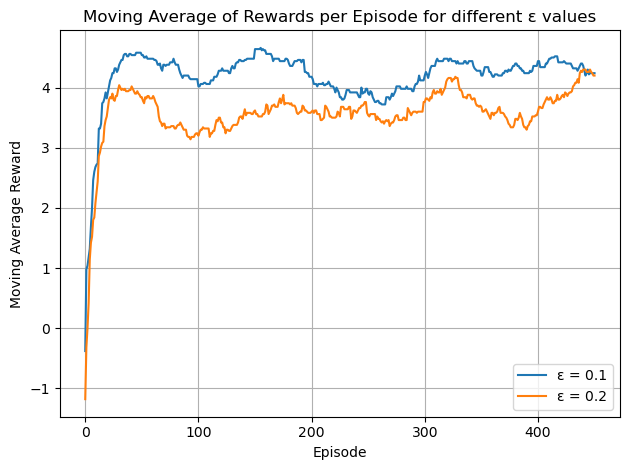

In [12]:
print("Training for epsilon=0.1")
Q1,rewards_01=train(0.1,0.1,0.99,500)
print("Training for epsilon=0.2")
Q2,rewards_02=train(0.2,0.1,0.9,500)
ma_rewards_eps_01 = moving_average(rewards_01)
ma_rewards_eps_02 = moving_average(rewards_02)
import matplotlib.pyplot as plt 
plt.plot(ma_rewards_eps_01, label='ε = 0.1')
plt.plot(ma_rewards_eps_02, label='ε = 0.2')
plt.xlabel('Episode')
plt.ylabel('Moving Average Reward')
plt.title('Moving Average of Rewards per Episode for different ε values')   
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Task 3

In [13]:
import random 
class ReplayBuffer:
    def __init__(self,capacity):
        self.capacity=capacity
        self.buffer=[]
        self.position=0
    def push(self,state,action,reward,next_state,done):
        if len(self.buffer)<self.capacity:
            self.buffer.append(None)
        self.buffer[self.position]=(state,action,reward,next_state,done)
        self.position=(self.position+1)%self.capacity
    
    def sample(self,batch_size):
        batch=random.sample(self.buffer,batch_size)
        states,actions,rewards,next_states,dones=map(np.array,zip(*batch))
        return states,actions,rewards,next_states,dones
    def __len__(self):
        return len(self.buffer)

In [14]:
buffer = ReplayBuffer(capacity=100)
for i in range(100):
    state=[random.randint(0,1000) for _ in range(2)]
    action=random.randint(0,3)
    reward=random.uniform(-1,1)
    next_state=[random.randint(0,1000) for _ in range(2)]
    done=random.choice([True,False])
    buffer.push(state,action,reward,next_state,done)
batch_size=32
states, actions, rewards, next_states, dones = buffer.sample(batch_size)
print("States shape:", states.shape, "| dtype:", states.dtype)
print("Actions shape:", actions.shape, "| dtype:", actions.dtype)
print("Rewards shape:", rewards.shape, "| dtype:", rewards.dtype)
print("Next_states shape:", next_states.shape, "| dtype:", next_states.dtype)
print("Dones shape:", dones.shape, "| dtype:", dones.dtype)

States shape: (32, 2) | dtype: int64
Actions shape: (32,) | dtype: int64
Rewards shape: (32,) | dtype: float64
Next_states shape: (32, 2) | dtype: int64
Dones shape: (32,) | dtype: bool


# Task 4

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as fun 
import time

In [16]:
import torch

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

my_tensor = torch.randn(3, 3) 

my_tensor = my_tensor.to(device)

print(my_tensor)


tensor([[ 0.5739, -0.2316,  1.0064],
        [ 0.0278,  2.2788,  0.4647],
        [-0.6018, -0.6345,  0.1502]], device='mps:0')


In [17]:
class DQNPolicy(nn.Module):
    def __init__(self, dim, n_actions):
        super(DQNPolicy,self).__init__()
        self.layer_1=nn.Linear(dim,128)
        self.layer_2=nn.Linear(128,128)
        self.output=nn.Linear(128,n_actions)
    def forward(self,x):
        x=fun.relu(self.layer_1(x))
        x=fun.relu(self.layer_2(x))
        x=self.output(x)
        return x



In [18]:
class DQNTarget(nn.Module):
    def __init__(self, dim, n_actions):
        super(DQNTarget,self).__init__()
        self.layer_1=nn.Linear(dim,128)
        self.layer_2=nn.Linear(128,128)
        self.output=nn.Linear(128,n_actions)
    def forward(self,x):
        x=fun.relu(self.layer_1(x))
        x=fun.relu(self.layer_2(x))
        x=self.output(x)
        return x

In [19]:
def update_target(policy_net, target_net):
    target_net.load_state_dict(policy_net.state_dict())

# Task 5

In [20]:
import numpy as np
import gym
import torch
import torch.nn as nn
import torch.nn.functional as fun 
import time
import torch.optim as optim

In [21]:
import gym

env = gym.make('CartPole-v1')
env.reset()

try:
    for _ in range(1000):
        env.render()
        action = env.action_space.sample()
        obs, reward, done, info = env.step(action)
        if done:
            env.reset()
finally:
    env.close() 

In [22]:
class DQNPolicy(nn.Module):
    def __init__(self, dim, n_actions):
        super(DQNPolicy,self).__init__()
        self.layer_1=nn.Linear(dim,128)
        self.layer_2=nn.Linear(128,128)
        self.output=nn.Linear(128,n_actions)
    def forward(self,x):
        x=fun.relu(self.layer_1(x))
        x=fun.relu(self.layer_2(x))
        x=self.output(x)
        return x

In [23]:
class DQNTarget(nn.Module):
    def __init__(self, dim, n_actions):
        super(DQNTarget,self).__init__()
        self.layer_1=nn.Linear(dim,128)
        self.layer_2=nn.Linear(128,128)
        self.output=nn.Linear(128,n_actions)
    def forward(self,x):
        x=fun.relu(self.layer_1(x))
        x=fun.relu(self.layer_2(x))
        x=self.output(x)
        return x

In [24]:
def update_target(policy_net, target_net):
    target_net.load_state_dict(policy_net.state_dict())

In [25]:
dim=env.observation_space.shape[0]
n_actions=env.action_space.n
policy_net=DQNPolicy(dim,n_actions).to(device)
target_net=DQNTarget(dim,n_actions).to(device)
update_target(policy_net,target_net)

In [26]:
optimizer = optim.Adam(policy_net.parameters(), lr=1e-4)
loss_fn = nn.MSELoss()
Replay_Buffer=ReplayBuffer(capacity=10000)

In [27]:
# Hyperparameters
N = 500  # total episodes
M = N / 2  # epsilon decay over M episodes
X = 10  # target network update frequency
gamma = 0.99
batch_size = 128
epsilon = 1.0

In [28]:
epoch_rewards = []
for epoch in range(N):
    state=env.reset()[0] if isinstance(env.reset(), tuple) else env.reset()
    done=False
    total_reward=0
    epsilon=max(0.01,1-(epoch/M))
    while not done:
        if np.random.rand()<epsilon:
            action=env.action_space.sample()
        else:
            with torch.no_grad():
                state_tensor = torch.FloatTensor(state).unsqueeze(0).to(device)    
                q_values = policy_net(state_tensor)
                action = torch.argmax(q_values).item()
        next_state, reward, done, info = env.step(action)
        Replay_Buffer.push(state, action, reward, next_state, done)
        state=next_state
        total_reward+=reward
        if len(Replay_Buffer) >= batch_size:
            states, actions, rewards, next_states, dones = Replay_Buffer.sample(batch_size)
            states = torch.FloatTensor(states).to(device)
            actions = torch.LongTensor(actions).unsqueeze(1).to(device)
            rewards = torch.FloatTensor(rewards).to(device)
            next_states = torch.FloatTensor(next_states).to(device)
            dones = torch.FloatTensor(dones).to(device)
            q_values = policy_net(states).gather(1, actions).squeeze(1)

            next_q_values = target_net(next_states).max(1)[0]
            target_q_values = rewards + gamma * next_q_values.detach() * (1 - dones)
            loss=loss_fn(q_values, target_q_values)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    epoch_rewards.append(total_reward)    
    if epoch % X == 0:
        update_target(policy_net, target_net)
    if (epoch + 1) % 50 == 0:
        avg = np.mean(epoch_rewards[-50:])
        print(f"Episode {epoch + 1}, Avg Reward (last 50): {avg:.2f}")

Episode 50, Avg Reward (last 50): 19.74
Episode 100, Avg Reward (last 50): 39.32
Episode 150, Avg Reward (last 50): 131.84
Episode 200, Avg Reward (last 50): 256.14
Episode 250, Avg Reward (last 50): 294.24
Episode 300, Avg Reward (last 50): 233.50
Episode 350, Avg Reward (last 50): 225.84
Episode 400, Avg Reward (last 50): 217.08
Episode 450, Avg Reward (last 50): 215.20
Episode 500, Avg Reward (last 50): 208.96


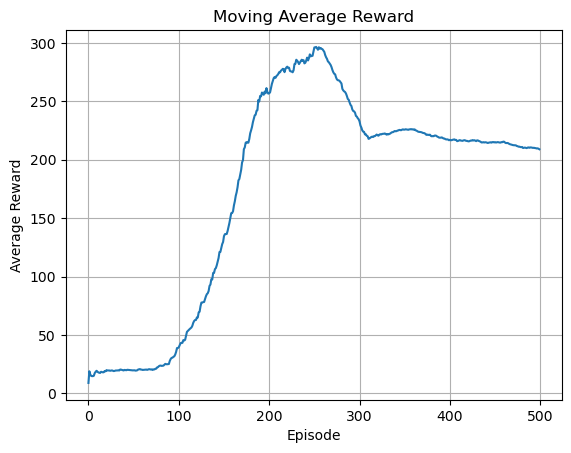

In [29]:
window = N // 10
moving_avg = [np.mean(epoch_rewards[i-window:i+1]) if i >= window else np.mean(epoch_rewards[:i+1]) for i in range(N)]
plt.plot(moving_avg)
plt.title("Moving Average Reward")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.grid()
plt.show()

In [30]:
success_count = sum([r >= 195 for r in epoch_rewards])
success_rate = 100.0 * success_count / N
print(f"Final Success Rate: {success_rate:.2f}%")

Final Success Rate: 70.00%
